-  visualizating dummy data

In [ ]:
#dummy data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x=np.array([1,2,3,4,5]).reshape(-1,1)
y=np.array([3,6,13,28,55])

In [ ]:
#linear regression
linear_model=LinearRegression()
linear_model.fit(x,y)
y_pred=linear_model.predict(x)

In [ ]:
#polynomial regression(degree2)
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
poly_model=LinearRegression()
poly_model.fit(x_poly,y)
y_pred_poly=poly_model.predict(x_poly)

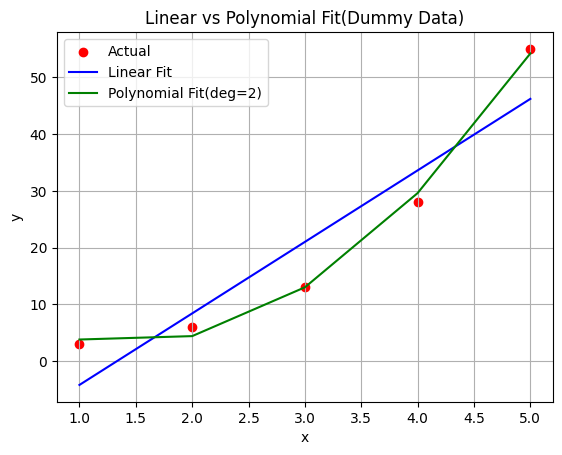

In [ ]:
#plot
plt.scatter(x,y,color='red',label='Actual')
plt.plot(x,y_pred,label='Linear Fit',color='blue')
plt.plot(x,y_pred_poly,label='Polynomial Fit(deg=2)',color='green')
plt.title('Linear vs Polynomial Fit(Dummy Data)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Real dataset:salary prediction
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
# load dataset
df=pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [ ]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Years of Experience,0
Salary,0


In [ ]:
# train-test split
X=df[["Years of Experience"]]
y=df["Salary"]

X_train,X_test,y_train,y_test=train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42)

- linear regression

In [ ]:
# train linear regression
lin_model=LinearRegression()
lin_model.fit(X_train,y_train)
y_pred_lin=lin_model.predict(X_test)

In [ ]:
#metrics
mse_lin=mean_squared_error(y_test,y_pred_lin)
rmse_lin=np.sqrt(mse_lin)
r2_lin=r2_score(y_test,y_pred_lin)

print("Linear Regression:")
print("MSE:",mse_lin)
print("RMSE:",rmse_lin)
print("R2 Score:",r2_lin)

Linear Regression:
MSE: 946833177.7094355
RMSE: 30770.654489455297
R2 Score: 0.6669549610495003


- polynomial regression

In [ ]:
# degree 2
poly2=PolynomialFeatures(degree=2)
X_train_poly2=poly2.fit_transform(X_train)
X_test_poly2=poly2.transform(X_test)

poly2_model=LinearRegression()
poly2_model.fit(X_train_poly2,y_train)
y_pred_poly2=poly2_model.predict(X_test_poly2)

In [ ]:
X_train_poly2

array([[  1.,   3.,   9.],
       [  1.,   6.,  36.],
       [  1.,  10., 100.],
       ...,
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   2.,   4.]])

In [ ]:
X_test_poly2

array([[ 1.,  2.,  4.],
       [ 1.,  8., 64.],
       [ 1.,  3.,  9.],
       ...,
       [ 1.,  1.,  1.],
       [ 1.,  3.,  9.],
       [ 1.,  0.,  0.]])

In [ ]:
#metrics
mse_poly2=mean_squared_error(y_test,y_pred_poly2)
rmse_poly2=np.sqrt(mse_poly2)
r2_poly2=r2_score(y_test,y_pred_poly2)

In [ ]:
#degree4
poly4=PolynomialFeatures(degree=4)
X_train_poly4=poly4.fit_transform(X_train)
X_test_poly4=poly4.transform(X_test)

poly4_model=LinearRegression()
poly4_model.fit(X_train_poly4,y_train)
y_pred_poly4=poly4_model.predict(X_test_poly4)

In [ ]:
X_train_poly4

array([[1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       ...,
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01]])

In [ ]:
X_test_poly4

array([[1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       ...,
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [ ]:
#metrics
mse_poly4=mean_squared_error(y_test,y_pred_poly4)
rmse_poly4=np.sqrt(mse_poly4)
r2_poly4=r2_score(y_test,y_pred_poly4)

print("\nPolynomial Regression (Degree 2):")
print("MSE:",mse_poly2)
print("RMSE:",rmse_poly2)
print("R2 Score:",r2_poly2)

print("\nPolynomial Regression (Degree 4):")
print("MSE:",mse_poly4)
print("RMSE:",rmse_poly4)
print("R2 Score:",r2_poly4)


Polynomial Regression (Degree 2):
MSE: 726857249.7211918
RMSE: 26960.290238074067
R2 Score: 0.7443306732971963

Polynomial Regression (Degree 4):
MSE: 720033651.6859531
RMSE: 26833.44278481524
R2 Score: 0.7467308484568018


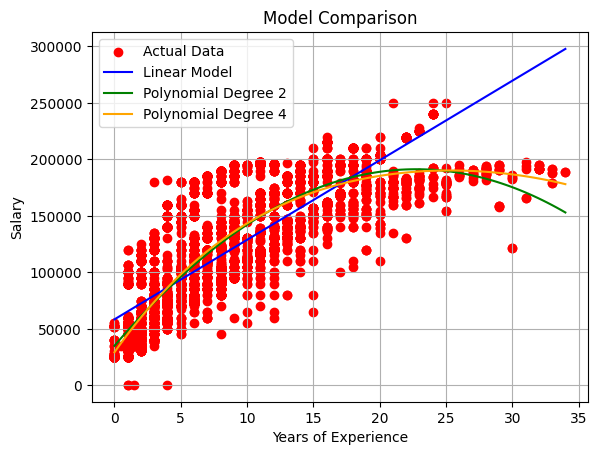

In [ ]:
#visualization of all models
X_range=np.linspace(X.min(),X.max(),100).reshape(-1,1)

#create dataframe with column name
X_range_df=pd.DataFrame(X_range,columns=['Years of Experience'])

#transform using polynomial features
X_range_poly2=poly2.transform(X_range_df)
X_range_poly4=poly4.transform(X_range_df)

#predict using models
y_range_lin=lin_model.predict(X_range_df)
y_range_poly2=poly2_model.predict(X_range_poly2)
y_range_poly4=poly4_model.predict(X_range_poly4)

#plot
plt.scatter(X,y,color='red',label='Actual Data')
plt.plot(X_range,y_range_lin,label='Linear Model',color='blue')
plt.plot(X_range,y_range_poly2,label='Polynomial Degree 2',color='green')
plt.plot(X_range,y_range_poly4,label='Polynomial Degree 4',color='orange')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Model Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#model performance comparison
metrics_df=pd.DataFrame({
    'Model':["Linear Regression","Polynomial (Degree 2)","Polynomial (Degree 4)"],
    'MSE':[mse_lin,mse_poly2,mse_poly4],
    'RMSE':[rmse_lin,rmse_poly2,rmse_poly4],
    'R2 Score':[r2_lin,r2_poly2,r2_poly4]
})

metrics_df.style.format({
    'MSE':'{:.2f}',
    'RMSE':'{:.2f}',
    'R2 Score':'{:.4f}'
})

,Model,MSE,RMSE,R2 Score
0,Linear Regression,946833177.71,30770.65,0.6670
1,Polynomial (Degree 2),726857249.72,26960.29,0.7443
2,Polynomial (Degree 4),720033651.69,26833.44,0.7467
